In [101]:
import numpy as np
from prime_sieve.array import PrimeArraySieve
import matplotlib.pyplot as plt
import cmath
import scipy.fft

In [109]:
def return_matrix(arr, factor):
    x, y = factor
    mat = np.zeros((x,y), dtype=np.int64)
    for i in range(x*y):
        mat[i%x, i%y] = arr[i]
    return mat

def sequence(prime_num):
    m = np.arange(1,prime_num)
    n = np.zeros(prime_num-1, dtype=np.int64)
    prime_root = np_roots(prime_num)
    for i in range(1, prime_num):
        n[i-1] = pow(prime_root, i, prime_num)  #n[i-1] = (prime_root ** i) % prime_num
    return n

def np_roots(number, only_lowest=True):
    roots = []
    for r in range(2, number):
        k = r % number
        for o in range(2, number):
            k = (k*r) % number
            if k <= 1:
                break
        if o == number-1:
            roots.append(r)
            if only_lowest:
                return r
    return roots

def convolve_signal(sig, diffuser, normalize=True):
    flattened_diffuser = diffuser.flatten()
    if sig.shape[0] < flattened_diffuser.shape[0]:
        conv = f'Signal to be convolved has {sig.shape}. It needs to be at least {flattened_diffuser.shape}.'
    else:
        conv = np.convolve(sig, flattened_diffuser)
        if normalize:
            conv = conv / np.max(np.abs(conv))
    return conv if not isinstance(conv, str) else print(conv)
        
def get_well_depth(matrix, _lambda, p):
    return matrix * (_lambda / (2 * p)) # p = p-1???

def phase_change(matrix, _lambda):
    y = np.exp(-2 * np.pi * 1j * ((2 * matrix) / _lambda))
    y = np.angle(y)
    return y

def old_phase(matrix, _lambda):
    return (2 * matrix) * ((2 * np.pi) / _lambda) # technically calc the same

def get_lambda(fg):
    return 343/fg

def get_periods(fg, amount):
    return (1/fg) * amount

def pure_sine_wave(frequency, duration, sampling_rate, initial, periods=None):
    if periods is not None:
        duration = get_periods(frequency, periods)
    phase_change = np.arange((1/frequency) * sampling_rate, dtype=int)
    time = np.roll(np.linspace(0, duration, int(duration * sampling_rate)), -phase_change[int((phase_change.shape[0]/360)*initial)])
    sinewave = np.sin(2 * np.pi * frequency * time)
    return sinewave

def _time_delay(depth, c=343): # 
    return (2 * depth) / c # c in m/s -> s

def factor(n, min_x=1, max_x=1):
    out = list()
    lower = int(n / max_x) - 1
    upper = int(n / min_x) + 1
    if max_x == 1:
        lower = 1
    for i in range(*sorted((lower, upper))):
        if np.gcd(i, n//i) <= 1:
            out.append(((n//i), i))
    return list(sorted(out))

def get_panel_size(max_x, max_y, f_upper):
    c = 343
    column_width = (c / f_upper / 2) * 100
    x_wells = max_x / column_width
    y_wells = max_y / column_width
    return {'x': x_wells, 'y': y_wells, 'area': x_wells * y_wells}
    #return (max_x / column_width) * (max_y / column_width)
    
def reflection_factor(depth, _lambda):
    # as written in EQ2 schroeder patent
    return np.exp(-2 * np.pi * 1j * ((2 * depth) / _lambda))
    
def schroeder_grating(prime_num, width, _lambda, alpha_incidence=np.arange(-90,91), alpha_diffraction=np.arange(-90,91)):
    alpha_incidence = alpha_incidence.reshape((181,1))
    return (prime_num-1) * width * ((np.sin(alpha_incidence) + np.sin(alpha_diffraction)) / _lambda)

def get_unique_sequences(_range):
    ld = {}
    sieve = PrimeArraySieve()
    for k in sieve.primes_in_range(_range):
        k = int(k)
        sn = sequence(k)
        u, c = np.unique(sn, return_counts=True)
        if c.shape[0]-1 == sn.shape[0] or c.shape == sn.shape:
            ld[k] = {'unique': u, 'count': c, 'sequence': sn}
    return ld

In [10]:
factor(2083-1,50,100)

19 42


[(50, 41),
 (53, 39),
 (56, 37),
 (59, 35),
 (61, 34),
 (65, 32),
 (67, 31),
 (71, 29),
 (77, 27),
 (83, 25),
 (90, 23),
 (109, 19)]

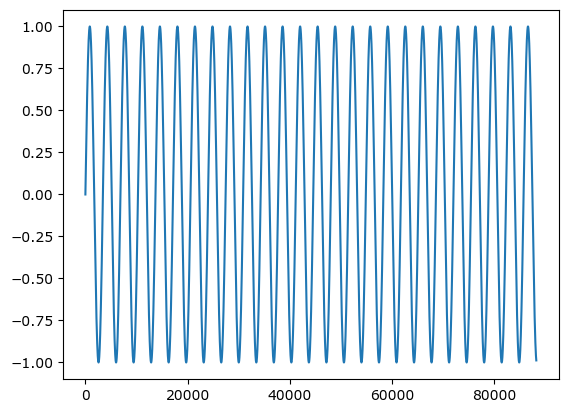

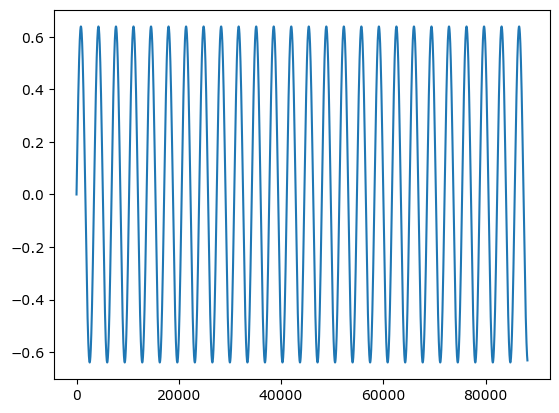

In [138]:
sine = pure_sine_wave(_lambda*15,2,44100,0)
plt.plot(sine)
plt.show()
ss = sine * np.sum(rh) # reshape((sine.shape[0], 1))
plt.plot(ss)
plt.show()

In [119]:
prime_num = 2083
fg = 400
_lambda = get_lambda(fg)
factor = (71,29)
seq = sequence(prime_num)
mat = return_matrix(seq, factor)
dep = get_well_depth(mat, _lambda, prime_num)
pac = phase_change(dep, _lambda)
rh = reflection_factor(dep, _lambda)
opac = old_phase(dep, _lambda)
oopac = old_phase(dep, _lambda)

In [112]:
xx = schroeder_grating(prime_num, 0.001, _lambda)

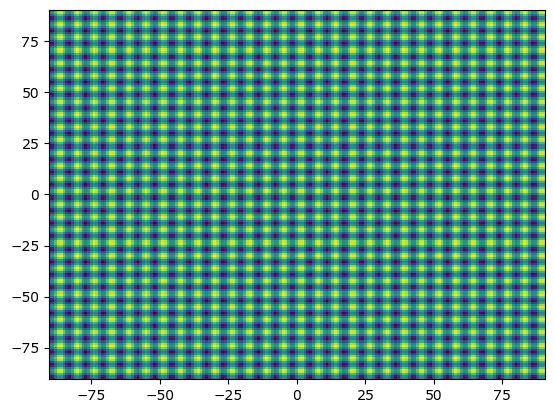

In [114]:
xy = np.arange(-90,91)
fig, ax = plt.subplots()
ax.pcolormesh(xy,xy,xx)